# Лаба №2 Козлов, Ярикова. А-03 moment

| Вариант | Класс     |
|:---------:|:-----------:|
| 9       | 6, 17, 19 |

| № класса | Название класса          |
|:----------:|:--------------------------:|
| 6        | 'comp.windows.x'  |
| 17       | 'talk.politics.guns' |
| 19       | 'talk.politics.misc' |

# П2. Импорт библиотек

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import numpy as np

# П3. Загрузка выборки

In [2]:
categories = ['comp.windows.x', 'talk.politics.guns', 'talk.politics.misc'] 
remove = ('headers', 'footers', 'quotes')
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, categories=categories, remove=remove)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, categories=categories, remove=remove)

# П4. Вывести на экран по одному-два документа каждого класса.

In [3]:
print(twenty_train.keys())
print(twenty_train['target'])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
[1 2 0 ... 2 0 1]


In [4]:
print(twenty_train['target_names'][0], twenty_train['data'][list(twenty_train['target']).index(0)], sep='\n',
      end="\n----------------------------------\n\n")
print(twenty_train['target_names'][1], twenty_train['data'][list(twenty_train['target']).index(1)], sep='\n',
      end="\n----------------------------------\n\n")
print(twenty_train['target_names'][2], twenty_train['data'][list(twenty_train['target']).index(2)], sep='\n',
      end="\n----------------------------------\n\n")

comp.windows.x
Hi, looking for any advice or suggestions about a problem I'm
having with MIT X11R5's editres, in particular under twm variants.

For a start, 9 times out of 10 (but NOT always) editres won't
grab a widget tree when running on our NCD (Decwindows) Xterms,
which I'm told will be fixed when the R5 (not R4) XDm is installed.
OK, so I tried running it on a Sun, running real R5, on the same
network - I get a widget tree, but it's ALWAYS for 'TWM Icon Manager'

Anybody know of any patches for (a) twm or (b) editres that I should
look at?
----------------------------------

talk.politics.guns

That's open for debate.  Certainly, an excessive number of people are
murdered every year but people also do save innocent lives with firearms.
The media just don't tell us when it happens...


I think there are more of us than there are federal marshalls...


Crap.  It's simplistic thinking on the part of feather-headed dolts.


Nuts.
----------------------------------

talk.politics.mis

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\u522-16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# П5. Стемминг

In [6]:
from nltk.stem import *
from nltk import word_tokenize

porter_stemmer = PorterStemmer()
stem_train = []; stem_test = []
for text in twenty_train.data:
    nltk_tokens = word_tokenize(text)
    line = ''
    for word in nltk_tokens:
        line += ' ' + porter_stemmer.stem(word)
    stem_train.append(line)

for text in twenty_test.data:
    nltk_tokens = word_tokenize(text)
    line = ''
    for word in nltk_tokens:
        line += ' ' + porter_stemmer.stem(word)
    stem_test.append(line)
    

# П6. Векторизация
**Описание *CountVectorizer*:**

__*CountVectorizer*__ means breaking down a sentence or any text into words by performing preprocessing tasks like converting all words to lowercase, thus removing special characters. In NLP models can't understand textual data they only accept numbers, so this textual data needs to be vectorized.

__*CountVectorizer*__ означает разбиение предложения или любого текста на слова путем выполнения задач предварительной обработки, таких как преобразование всех слов в нижний регистр и удаление специальных символов. В моделях NLP не могут понимать текстовые данные, они принимают только числа, поэтому эти текстовые данные необходимо векторизовать.

Предобработка текста, токенизация и отбрасывание стоп-слов включены в состав модуля __*CountVectorizer*__, который позволяет создать словарь характерных признаков и перевести документы в векторы признаков.

## без отсечения стоп-слов и без стемминга

In [7]:
vect = CountVectorizer(max_features = 10000, stop_words = None)

vect.fit(twenty_train.data)  # Создание векторного словаря признаков

train_data = vect.transform(twenty_train.data)  # Перевод текста в векторный вид
test_data = vect.transform(twenty_test.data)  # Перевод текста в векторный вид

### Вывод первых 20-ти слов по частоте встречаемости
### Коэффициент Жаккара

а — количество видов на первой пробной площадке, b — количество видов на второй пробной площадке, с — количество видов, общих для 1-й и 2-й площадок.


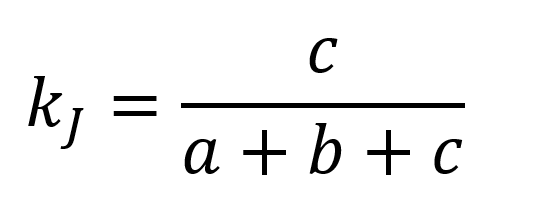

In [8]:
from IPython.display import Image
print('а — количество видов на первой пробной площадке, b — количество видов на второй пробной площадке, с — количество видов, общих для 1-й и 2-й площадок.')
Image("image/Jaccard.png", width=320, height=240)

In [9]:
def print_frequency_words(train, test, class_num=None, stop_words=None):

    if class_num is not None:
        train = [twenty_train.data[i] for i in np.where(twenty_train.target == class_num)[0]]

    vect = CountVectorizer(max_features = 10000, stop_words = stop_words)
    train_data = vect.fit_transform(train)

    x = list(zip(vect.get_feature_names_out(), np.ravel(train_data.sum(axis=0))))
    x.sort(key=lambda row: row[1], reverse=True) 
    if class_num is not None:
        print(f'Первые 20 наиболее частотных слов {class_num} класса:')
    else:
        print(f'Первые 20 наиболее частотных слов всей выборки:')
#     [print(x[i]) for i in range(20)]
    print(x[:20])
    
def calc_jaccard_coef(first_list, second_list):
    '''Рассчет коэффициента Жаккара'''
    first_set = set(first_list)
    second_set = set(second_list)
    total = len(first_set.intersection(second_set))
    coef = total / (len(first_set) + len(second_set) - total)
    return coef

def print_jaccard_coef(data, c0, c1, stop_words=None):
    class0 = [data[i] for i in np.where(twenty_train.target == c0)[0]]
    class1 = [data[i] for i in np.where(twenty_train.target == c1)[0]]
    vect0 = CountVectorizer(max_features = 10000, stop_words = stop_words).fit(class0)
    vect1 = CountVectorizer(max_features = 10000, stop_words = stop_words).fit(class1)
    print(f'Коэффициент Жаккара между {c0} и {c1} классами:', end='\t')
    print(round(calc_jaccard_coef(vect0.get_feature_names_out(), vect1.get_feature_names_out()), 3))

### Без удаления стоп слов и стемминга

In [10]:
print_frequency_words(twenty_train.data, twenty_test.data, class_num=None); print()
print_frequency_words(twenty_train.data, twenty_test.data, class_num=0); print()
print_frequency_words(twenty_train.data, twenty_test.data, class_num=1); print()
print_frequency_words(twenty_train.data, twenty_test.data, class_num=2); print()

print_jaccard_coef(twenty_train.data, 0, 1)
print_jaccard_coef(twenty_train.data, 0, 2)
print_jaccard_coef(twenty_train.data, 1, 2)

Первые 20 наиболее частотных слов всей выборки:
[('the', 21030), ('to', 11046), ('of', 8892), ('and', 7733), ('in', 5967), ('that', 5745), ('is', 5640), ('it', 4248), ('for', 3630), ('you', 3614), ('this', 3047), ('on', 2910), ('be', 2610), ('are', 2540), ('have', 2415), ('not', 2353), ('with', 2243), ('as', 2143), ('or', 2055), ('if', 1918)]

Первые 20 наиболее частотных слов 0 класса:
[('the', 6750), ('to', 3486), ('and', 2447), ('of', 2296), ('is', 2269), ('in', 1848), ('for', 1394), ('it', 1261), ('on', 1141), ('that', 1130), ('this', 1125), ('you', 1066), ('be', 956), ('are', 893), ('if', 836), ('with', 821), ('or', 778), ('can', 756), ('an', 730), ('not', 699)]

Первые 20 наиболее частотных слов 1 класса:
[('the', 6698), ('to', 3315), ('of', 3223), ('and', 2402), ('in', 1937), ('that', 1795), ('is', 1494), ('it', 1194), ('you', 1144), ('for', 1020), ('this', 844), ('have', 769), ('be', 761), ('on', 747), ('or', 733), ('not', 730), ('they', 730), ('are', 713), ('as', 701), ('by', 

### С удалением стоп-слов

In [11]:
print_frequency_words(twenty_train.data, twenty_test.data, class_num=None, stop_words='english'); print()
print_frequency_words(twenty_train.data, twenty_test.data, class_num=0, stop_words='english'); print()
print_frequency_words(twenty_train.data, twenty_test.data, class_num=1, stop_words='english'); print()
print_frequency_words(twenty_train.data, twenty_test.data, class_num=2, stop_words='english'); print()

print_jaccard_coef(twenty_train.data, 0, 1, stop_words='english')
print_jaccard_coef(twenty_train.data, 0, 2, stop_words='english')
print_jaccard_coef(twenty_train.data, 1, 2, stop_words='english')

Первые 20 наиболее частотных слов всей выборки:
[('people', 964), ('file', 886), ('don', 744), ('use', 723), ('like', 656), ('know', 628), ('gun', 621), ('think', 618), ('just', 608), ('window', 575), ('time', 544), ('mr', 529), ('program', 529), ('make', 493), ('edu', 484), ('president', 468), ('does', 465), ('government', 456), ('new', 444), ('right', 414)]

Первые 20 наиболее частотных слов 0 класса:
[('file', 579), ('window', 571), ('use', 459), ('program', 412), ('server', 385), ('edu', 377), ('motif', 356), ('widget', 354), ('entry', 351), ('output', 315), ('available', 306), ('com', 274), ('set', 274), ('using', 269), ('mit', 254), ('application', 253), ('like', 247), ('information', 245), ('sun', 240), ('does', 232)]

Первые 20 наиболее частотных слов 1 класса:
[('gun', 598), ('people', 392), ('file', 298), ('guns', 285), ('don', 255), ('firearms', 229), ('law', 206), ('right', 200), ('just', 190), ('like', 190), ('weapons', 190), ('control', 185), ('think', 184), ('government'

### Стоп-слова + смемминг

In [12]:
print_frequency_words(stem_train, stem_test, class_num=None, stop_words='english'); print()
print_frequency_words(stem_train, stem_test, class_num=0, stop_words='english'); print()
print_frequency_words(stem_train, stem_test, class_num=1, stop_words='english'); print()
print_frequency_words(stem_train, stem_test, class_num=2, stop_words='english'); print()

print_jaccard_coef(stem_train, 0, 1, stop_words='english')
print_jaccard_coef(stem_train, 0, 2, stop_words='english')
print_jaccard_coef(stem_train, 1, 2, stop_words='english')

Первые 20 наиболее частотных слов всей выборки:
[('thi', 3049), ('wa', 1655), ('use', 1557), ('file', 1117), ('ha', 1072), ('peopl', 965), ('ani', 958), ('gun', 915), ('like', 783), ('program', 776), ('window', 730), ('make', 698), ('work', 689), ('doe', 687), ('know', 677), ('think', 666), ('time', 663), ('state', 650), ('just', 608), ('right', 596)]

Первые 20 наиболее частотных слов 0 класса:
[('file', 579), ('window', 571), ('use', 459), ('program', 412), ('server', 385), ('edu', 377), ('motif', 356), ('widget', 354), ('entry', 351), ('output', 315), ('available', 306), ('com', 274), ('set', 274), ('using', 269), ('mit', 254), ('application', 253), ('like', 247), ('information', 245), ('sun', 240), ('does', 232)]

Первые 20 наиболее частотных слов 1 класса:
[('gun', 598), ('people', 392), ('file', 298), ('guns', 285), ('don', 255), ('firearms', 229), ('law', 206), ('right', 200), ('just', 190), ('like', 190), ('weapons', 190), ('control', 185), ('think', 184), ('government', 174), 

# Взвешивание tf-idf

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 2))
tfidf_matrix_train = tfidf.fit_transform(stem_train).toarray()
terms_train = tfidf.get_feature_names_out()

# П7. Pipeline. Классификация с использованием наивного байесовского метода

## Код для быстрой записи данных в таблицы (к лабе не относится)

In [14]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

class Table():
    def __init__(self, title=None, data=None, headlines=["Precision", "Recall", "F1-score", "Accuracy"],
                 indexes=["Стемминг отсутствует", "Стемминг есть",
                          "Стоп-слова есть", "Стоп-слова отсечены",
                       "Взвешивание Count", "Взвешивание TF", "Взвешивание TF-IDF",
                       "max_features 100", "max_features 1000", "max_features 2000", "max_features 5000", "max_features 10000"],
                weighted=True):
        
        self.headlines = headlines
        self.dataFrame = pd.DataFrame(columns=headlines, index=indexes)
        if weighted:
            self.dataFrame.columns = pd.MultiIndex.from_tuples(
                tuple(zip(('Weighted Avg', 'Weighted Avg', 'Weighted Avg', 'Weighted Avg'), self.dataFrame.columns)))
        
    def fill_row(self, row, data=[], pred='', target='', roc_auc=None):
        """
        Заполняет строки исходя из дефолта
        row - row index
        pred='' и target='' - полученные классификатором значения и целевые значения
        Заполняется значениями Weighted Avg"""
        data = []
        data.append(round(precision_score(target, pred, average='weighted'), 3))
        data.append(round(recall_score(target, pred, average='weighted'), 3))
        data.append(round(f1_score(target, pred, average='weighted'), 3))
        data.append(round(accuracy_score(target, pred,), 3))
        for i in range(len(self.headlines)):
            self.dataFrame.loc[row][i] = data[i]   
        return self.dataFrame.loc[row]
            
    def table(self):
        return self.dataFrame
        
    def __repr__(self):
        return f'{self.dataFrame}'
    
result_table = Table()

In [15]:
delimiter = "+++++++++++++++++++++++++++++++++++++++++++"
# result_table.table()

## Pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

def multiNB_pipeline(x_train, y_train, x_test, stop_words=None, max_features=1000, use_tf=True, use_idf=True):
    """Дофига умная функция классификации
    use_tf - использовать TfidfTransformer или нет
    """

    if use_tf:
        text_clf = Pipeline([('vect', CountVectorizer(max_features=max_features, stop_words=stop_words)),
                            ('tfidf', TfidfTransformer(use_idf=use_idf)),
                            ('clf', MultinomialNB()),])   
    else:
        text_clf = Pipeline([('vect', CountVectorizer(max_features=max_features, stop_words=stop_words)),
                        ('clf', MultinomialNB()),])
    
    text_clf = text_clf.fit(x_train, y_train)
    prediction = text_clf.predict(x_test)
    
    return prediction

## Поиск наилучших параметров классификации
 *По очереди перебираем параметры, оставляя лучшие*

### Наличие \ отсутствие стемминга

In [17]:
prediction = multiNB_pipeline(twenty_train.data, twenty_train.target, twenty_test.data, use_tf=False)
print(delimiter, result_table.fill_row(row='Стемминг отсутствует', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

prediction = multiNB_pipeline(stem_train, twenty_train.target, stem_test, use_tf=False)
print(delimiter, result_table.fill_row(row='Стемминг есть', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

+++++++++++++++++++++++++++++++++++++++++++
Weighted Avg  Precision    0.756
              Recall       0.746
              F1-score     0.749
              Accuracy     0.746
Name: Стемминг отсутствует, dtype: object
+++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++
Weighted Avg  Precision    0.763
              Recall       0.756
              F1-score     0.758
              Accuracy     0.756
Name: Стемминг есть, dtype: object
+++++++++++++++++++++++++++++++++++++++++++



### Отсечение \ не отсечение стоп-слов

In [18]:
prediction = multiNB_pipeline(stem_train, twenty_train.target, stem_test, use_tf=False)
print(delimiter, result_table.fill_row(row='Стоп-слова есть', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

prediction = multiNB_pipeline(stem_train, twenty_train.target, stem_test, stop_words='english', use_tf=False)
print(delimiter, result_table.fill_row(row='Стоп-слова отсечены', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

+++++++++++++++++++++++++++++++++++++++++++
Weighted Avg  Precision    0.763
              Recall       0.756
              F1-score     0.758
              Accuracy     0.756
Name: Стоп-слова есть, dtype: object
+++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++
Weighted Avg  Precision    0.806
              Recall       0.781
              F1-score     0.787
              Accuracy     0.781
Name: Стоп-слова отсечены, dtype: object
+++++++++++++++++++++++++++++++++++++++++++



### Взвешивание: Count, TF, TF-IDF

In [19]:
prediction = multiNB_pipeline(stem_train, twenty_train.target, stem_test, stop_words='english', use_tf=False)
print(delimiter, result_table.fill_row(row='Взвешивание Count', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

prediction = multiNB_pipeline(stem_train, twenty_train.target, stem_test, stop_words='english', use_tf=True, use_idf=False)
print(delimiter, result_table.fill_row(row='Взвешивание TF', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

prediction = multiNB_pipeline(stem_train, twenty_train.target, stem_test, stop_words='english', use_tf=True, use_idf=True)
print(delimiter, result_table.fill_row(row='Взвешивание TF-IDF', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

+++++++++++++++++++++++++++++++++++++++++++
Weighted Avg  Precision    0.806
              Recall       0.781
              F1-score     0.787
              Accuracy     0.781
Name: Взвешивание Count, dtype: object
+++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++
Weighted Avg  Precision    0.822
              Recall       0.784
              F1-score     0.793
              Accuracy     0.784
Name: Взвешивание TF, dtype: object
+++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++
Weighted Avg  Precision    0.831
              Recall       0.792
              F1-score     0.802
              Accuracy     0.792
Name: Взвешивание TF-IDF, dtype: object
+++++++++++++++++++++++++++++++++++++++++++



In [20]:
prediction = multiNB_pipeline(stem_train, twenty_train.target, stem_test, stop_words='english', max_features=100)
print(delimiter, result_table.fill_row(row='max_features 100', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

prediction = multiNB_pipeline(stem_train, twenty_train.target, stem_test, stop_words='english', max_features=1000)
print(delimiter, result_table.fill_row(row='max_features 1000', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

prediction = multiNB_pipeline(stem_train, twenty_train.target, stem_test, stop_words='english', max_features=2000)
print(delimiter, result_table.fill_row(row='max_features 2000', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

prediction = multiNB_pipeline(stem_train, twenty_train.target, stem_test, stop_words='english', max_features=5000)
print(delimiter, result_table.fill_row(row='max_features 5000', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

prediction = multiNB_pipeline(stem_train, twenty_train.target, stem_test, stop_words='english', max_features=10000)
print(delimiter, result_table.fill_row(row='max_features 10000', pred=prediction, target=twenty_test.target), delimiter+'\n', sep='\n')

+++++++++++++++++++++++++++++++++++++++++++
Weighted Avg  Precision    0.709
              Recall       0.685
              F1-score     0.694
              Accuracy     0.685
Name: max_features 100, dtype: object
+++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++
Weighted Avg  Precision    0.831
              Recall       0.792
              F1-score     0.802
              Accuracy     0.792
Name: max_features 1000, dtype: object
+++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++
Weighted Avg  Precision    0.849
              Recall       0.805
              F1-score     0.815
              Accuracy     0.805
Name: max_features 2000, dtype: object
+++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++
Weighted Avg  Precision    0.861
              Recall       0.812
              F1-score     0.822
              Accuracy     0.812
Name: max_features 5000, dtype: object
++++++

# П9. Выводы
В офшоры

In [21]:
(result_table.table())

Weighted Avg                         
                        Precision Recall F1-score Accuracy
Стемминг отсутствует        0.756  0.746    0.749    0.746
Стемминг есть               0.763  0.756    0.758    0.756
Стоп-слова есть             0.763  0.756    0.758    0.756
Стоп-слова отсечены         0.806  0.781    0.787    0.781
Взвешивание Count           0.806  0.781    0.787    0.781
Взвешивание TF              0.822  0.784    0.793    0.784
Взвешивание TF-IDF          0.831  0.792    0.802    0.792
max_features 100            0.709  0.685    0.694    0.685
max_features 1000           0.831  0.792    0.802    0.792
max_features 2000           0.849  0.805    0.815    0.805
max_features 5000           0.861  0.812    0.822    0.812
max_features 10000          0.875  0.811    0.824    0.811

### Эмперическим путем последовательно выявили лучшие параметры для классификации

- Отсечением стоп-слов убираем неинформативные признаки
- Стемминг служит для улучшения информативности признаков, т.к. в словах учитывается только основа слова. Это группирует слова с похожими значениями
- Далее взвешивание. Count - простой подсчет терминов в документе, TF - вес термина в конкретном документе, TF-IDF - мера, для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Такой способ __(TF-IDF)__ позволяет лучше подсчитывать важность термина, при этом учитывая всю выборку, за счет этого метод даёт лучшие результаты.
- При изменении количества используемых терминов (max_features), выяснили, что увеличение числа признаков дает лучшие результаты классификации, хотя однозначно не ясно, лучше 5000 или 10000 признаков. Однако надо учитывать, что слишком большая размерность может привести к временным трудностям в работе алгоритма. Так же стоит учитывать информативность признаков, как слова с большой частотой встречаемости, так и крайне редкие слова могут не давать улучшения качества классификации или ухудшать его.